In [1]:
import pandas as pd
data=pd.read_csv('diamond.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
Carat Weight    1200 non-null float64
Cut             1200 non-null object
Color           1200 non-null object
Clarity         1200 non-null object
Polish          1200 non-null object
Symmetry        1200 non-null object
Report          1200 non-null object
Price           1200 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 75.1+ KB


In [2]:
from pycaret.regression import *

In [3]:
s2 = setup(data, target = 'Price', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['Carat Weight'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1200, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
s2[0].columns

Index(['Carat Weight_Power2', 'cos(Carat Weight)', 'Cut_Fair', 'Cut_Good',
       'Cut_Ideal', 'Cut_Signature-Ideal', 'Cut_Very Good', 'Color_D',
       'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I', 'Clarity_FL',
       'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Polish_EX', 'Polish_G', 'Polish_ID',
       'Polish_VG', 'Symmetry_EX', 'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG',
       'Report_AGSL', 'Carat Weight_0.0', 'Carat Weight_1.0',
       'Carat Weight_10.0', 'Carat Weight_11.0', 'Carat Weight_2.0',
       'Carat Weight_3.0', 'Carat Weight_4.0', 'Carat Weight_5.0',
       'Carat Weight_6.0', 'Carat Weight_7.0', 'Carat Weight_8.0',
       'Carat Weight_9.0', 'Cut_Ideal_multiply_Carat Weight_Power2',
       'cos(Carat Weight)_multiply_Cut_Ideal',
       'Clarity_SI1_multiply_Carat Weight_Power2',
       'cos(Carat Weight)_multiply_Carat Weight_Power2',
       'Carat Weight_Power2_multiply_Polish_VG',
       'Color_D_mu

In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1258.3750,4.718184e+06,2172.1382,0.9338,0.1579,0.1163
1,1149.8723,3.696999e+06,1922.7583,0.9669,0.1268,0.0952
2,1335.5959,6.757153e+06,2599.4525,0.9358,0.1505,0.1197
3,1209.0919,5.250721e+06,2291.4451,0.9510,0.1389,0.1050
4,1092.3319,3.094987e+06,1759.2574,0.9701,0.1315,0.1052
5,941.9273,2.209661e+06,1486.4928,0.9651,0.1648,0.1104
6,1307.9742,1.006407e+07,3172.3911,0.8485,0.1472,0.1120
7,1044.3646,3.025470e+06,1739.3877,0.8881,0.1495,0.1134
8,1233.1747,4.269463e+06,2066.2679,0.9491,0.1466,0.1033
9,1352.3418,7.863545e+06,2804.2013,0.9475,0.1200,0.0935


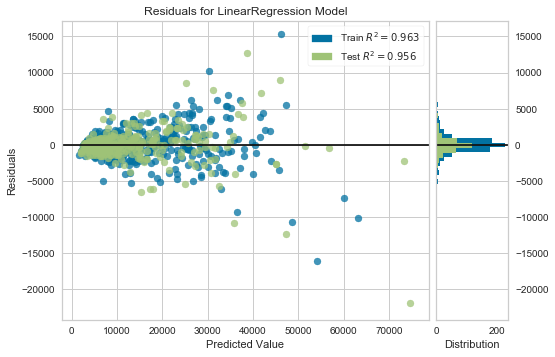

In [6]:
plot_model(lr)

In [7]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


In [8]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Sucessfully Loaded


In [9]:
deployment_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels_i...
                 ('dummy', Dummify(target='Price')),
                 ('fix_perfect', Remove_100(target='Price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions=['m